## Import the python packages that we need

In [1]:
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import matplotlib.pyplot as plt
import pmagpy.pmagplotlib as pmagplotlib
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch


%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

## Make a plot of the magnetic field in the present day

Let's use a built-in pmagpy function called `do_mag_map` to plot the present-day geomagnetic field.

In [12]:
type(1)

int

In [13]:
type(1.)

float

In [18]:
int(2.5)

2

In [22]:
round(2.5, 0)

2.0

In [2]:
pmag.do_mag_map??

Signature:
pmag.do_mag_map(
    date,
    lon_0=0,
    alt=0,
    file='',
    mod='cals10k',
    resolution='low',
)
Source:   
def do_mag_map(date, lon_0=0, alt=0, file="", mod="cals10k",resolution='low'):
    """
    returns lists of declination, inclination and intensities for lat/lon grid for
    desired model and date.

    Parameters:
    _________________
    date = Required date in decimal years (Common Era, negative for Before Common Era)

    Optional Parameters:
    ______________
    mod  = model to use ('arch3k','cals3k','pfm9k','hfm10k','cals10k.2','shadif14k','cals10k.1b','custom')
    file = l m g h formatted filefor custom model
    lon_0 : central longitude for Hammer projection
    alt  = altitude
    resolution = ['low','high'] default is low

    Returns:
    ______________
    Bdec=list of declinations
    Binc=list of inclinations
    B = list of total field intensities in nT
    Br = list of radial field intensities
    lons = list of longitudes evaluated
    l

In [9]:
pmagplotlib.plot_mag_map?

Signature:
pmagplotlib.plot_mag_map(
    fignum,
    element,
    lons,
    lats,
    element_type,
    cmap='coolwarm',
    lon_0=0,
    date='',
    contours=False,
    proj='PlateCarree',
)
Docstring:
makes a color contour map of geomagnetic field element

Parameters
____________
fignum : matplotlib figure number
element : field element array from pmag.do_mag_map for plotting
lons : longitude array from pmag.do_mag_map for plotting
lats : latitude array from pmag.do_mag_map for plotting
element_type : [B,Br,I,D] geomagnetic element type
    B : field intensity
    Br : radial field intensity
    I : inclinations
    D : declinations
Optional
_________
contours : plot the contour lines on top of the heat map if True
proj : cartopy projection ['PlateCarree','Mollweide']
       NB: The Mollweide projection can only be reliably with cartopy=0.17.0; otherwise use lon_0=0.  Also, for declinations, PlateCarree is recommended.
cmap : matplotlib color map - see https://matplotlib.org/example

In [3]:
date = 2020
model = 'igrf'
decs, incs , Bs, Brs, lons, lats = pmag.do_mag_map(date,mod=model)

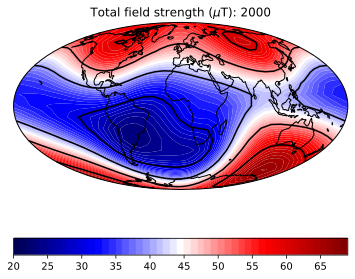

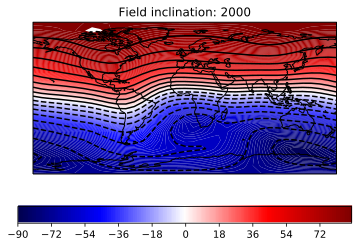

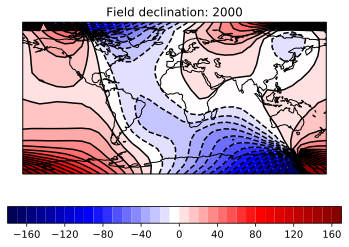

In [25]:
cmap='seismic'
plt.figure(figsize=(6,6))
pmagplotlib.plot_mag_map(1,Bs,lons,lats,'B',cmap=cmap,date=date,proj='Mollweide',contours=True) # plot the field strength
pmagplotlib.plot_mag_map(2,incs,lons,lats,'I',cmap=cmap,date=date,proj='PlateCarree',contours=True)# plot the inclination
pmagplotlib.plot_mag_map(3,decs,lons,lats,'D',cmap=cmap,date=date,contours=True)# plot the declination  
plt.show()

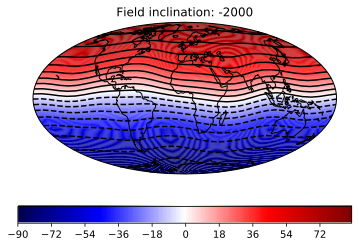

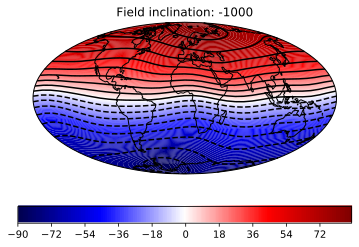

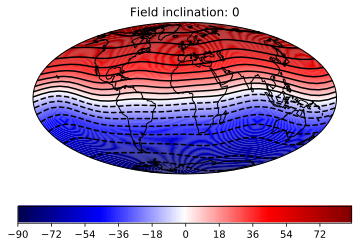

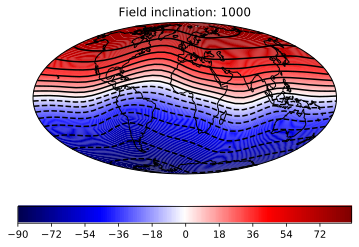

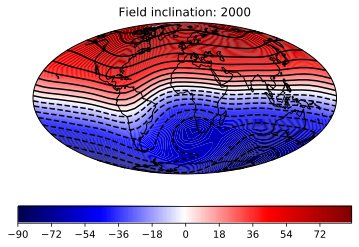

In [26]:
model = 'cals10k.2'

for date in [-2000, -1000, 0, 1000, 2000]:
    decs, incs , Bs, Brs, lons, lats = pmag.do_mag_map(date,mod=model)
    pmagplotlib.plot_mag_map(2,incs,lons,lats,'I',cmap=cmap,date=date,proj='Mollweide',contours=True)# plot the inclination
    plt.show()

<Figure size 576x432 with 0 Axes>

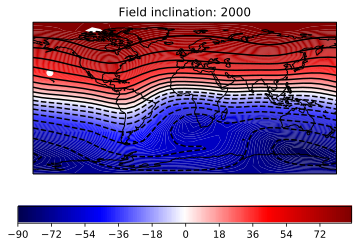

In [57]:
model = 'cals3k'

for date in [2000]:
    plt.figure(figsize = (8,6))
    decs, incs , Bs, Brs, lons, lats = pmag.do_mag_map(date,mod=model)
    mymap = pmagplotlib.plot_mag_map(2,incs,lons,lats,'I',cmap=cmap,date=date,proj='PlateCarree',contours=True)# plot the inclination
    mymap.scatter(200, 30, color = 'white')
    plt.show()

## The relationship between latitude and inclination

Calculate, plot, and discuss the relationship between latitude and inclination for a dipolar field.

In [38]:
lat_array = np.arange(-np.pi/2,np.pi/2, 0.1)
inc_array = np.arctan(2*np.tan(lat_array))

In [39]:
plot_lat_array = np.rad2deg(lat_array)
plot_inc_array = np.rad2deg(inc_array)

In [78]:
location_list = pmag.get_unf(1000)


In [79]:
class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=height + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

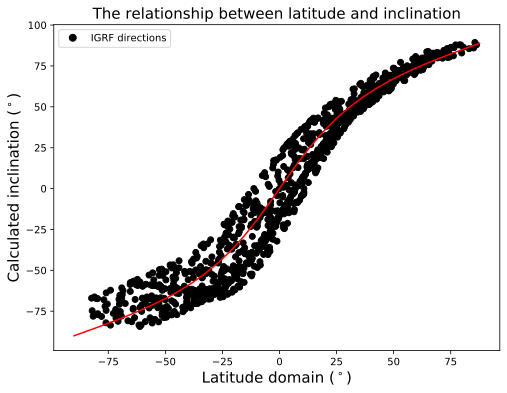

In [80]:
plt.figure(figsize=(8,6))
plt.plot(plot_lat_array, plot_inc_array, color = 'red', label = 'ideal lat_inc plot')
for i in range(len(location_list)):
    lat = location_list[i][1]
    lon = location_list[i][0]
    this_direction = ipmag.igrf([2020,0,lat, lon])
    plt.scatter(lat, this_direction[1], color = 'black', zorder = 0)
plt.xlabel('Latitude domain ($^\circ$)', fontsize = 15)
plt.ylabel('Calculated inclination ($^\circ$)', fontsize = 15)

igrf_legend = mpatches.Circle((0,0), radius = 1.5, edgecolor = 'black', facecolor='black', label='IGRF directions')

plt.legend(handles = [igrf_legend], handler_map={mpatches.Circle: HandlerEllipse()})
plt.title('The relationship between latitude and inclination', fontsize = 15)
plt.show()


## The relationship between latitude and field strength

Calculate, plot, and discuss the relationship between latitude and field strength for a dipolar field.

## Calculating and plotting a virtual geomagnetic pole position

Let's work through this problem together:

```
Problem 3

You went to Wyoming (112∘ W and 36∘ N) to sample some Cretaceous rocks. You measured a direction with a declination of 345∘ and an inclination of 47∘.

a) What direction would you expect from the present (GAD) field?

b) What is the virtual geomagnetic pole position corresponding to the direction you actually measured? [Hint: Use the function pmag.dia_vgp in the PmagPy module or for a challenge, write your own! ]
```

![](pole_determination.png)